# Banking Dataset - Marketing target 
# By (DENNIS MUIGO)
# Introduction 

The banking dataset contains data for 41188 customers and 21 columns with diffrent attributes from a portuguese banking institution. The classification goal is to predict whether a client will subscribe to term deposit (variable y).

# Understanding the context 

The data is related to  the direct marketing campaigns, where the marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (yes) or not (no).

# Detailed column Descriptions 

# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


# The main feature of interest in this dataset is to know whether a client will subscribe to a bank deposit term

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

# Importing required libraries

In [32]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Requirement already up-to-date: imbalanced-learn in c:\users\maureen\anaconda3\lib\site-packages (0.9.1)



In [62]:
# importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Loading the dataset into a data frame

In [34]:
# loading the dataset and reading the top 5 of the dataframe
data = pd.read_csv("bankmarketing.csv.zip")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
data.duration.head()

0    261
1    149
2    226
3    151
4    307
Name: duration, dtype: int64

# Data Assessing 

In [36]:
# Assesing the shape of our dataset and the info 
print("shape of the dataframe:", data.shape)
print("***************************************")
data.info()


shape of the dataframe: (41188, 21)
***************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  

# Checking for missing values in the df

In [37]:
data[data.columns[data.isnull().any()]].isnull().sum()*100/data.shape[0]

# There are no missing values in this dataset.

Series([], dtype: float64)

# Checking for those columns with categorical data that will be converted to numerical for training the data

In [38]:
data.select_dtypes('object').columns

# There are 11 categorical columns that need to be converted into numerical, for training the data 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

# Visualizing how our target variable is distributed

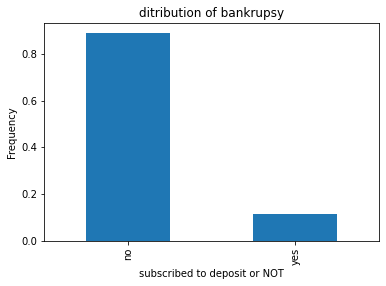

In [39]:
# Plot class balance
data['y'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel("subscribed to deposit or NOT")
plt.ylabel("Frequency")
plt.title("ditribution of bankrupsy");

No good news for the portuguese institution! Majority of the clients did not subscribe to deposit term. let's drill down a little farther. However, it also shows us that we have an imbalanced dataset, where our majority class is far bigger than our minority class NO > yes by far

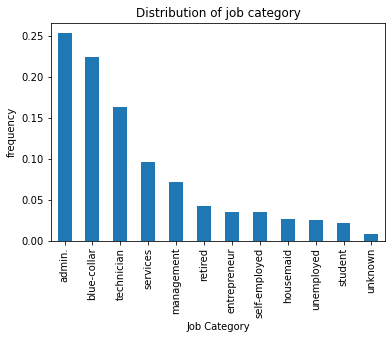

In [40]:
data['job'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel("Job Category")
plt.ylabel('frequency')
plt.title("Distribution of job category");


# Checking the distribution of  Age 


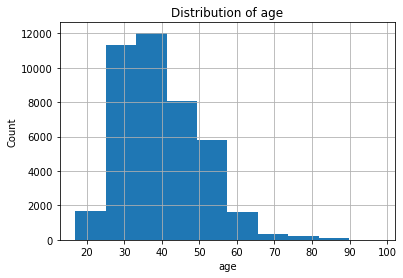

In [41]:
# Plot histogram of `Age`
data["age"].hist()
plt.xlabel("age")
plt.ylabel("Count"),
plt.title("Distribution of age");

Age group  (25-40) years has the signicant number of clients as customers of the bank. (40-50) holds quite an impressive figure but also we have outliers, those aged 90 years

In [42]:
#  number of days that passed by after the client was last contacted from a previous campaign 
# (numeric; 999 means client was not previously contacted)
data.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

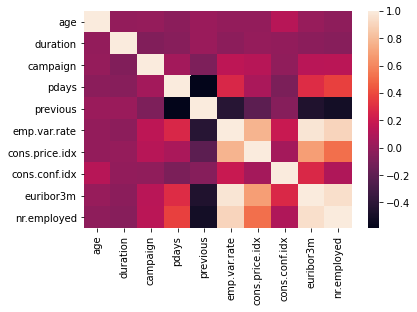

In [43]:
#checking for correlation for the numerical variables
corr = data.drop(columns = "y").corr()
sns.heatmap(corr);

In [44]:
# contact communication type
data.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

# Take away from data assessing

The data set is pretty clean. changes required to perform training will be converting categorical columns to numerical, using scikit learn ordinal encoder.

also the target variable is imbalanced and this will be addressed after splitting the data into training and test.

# Subsetting the data to only those clients who were contacted using telephone

In [45]:
# dropping duration column to have a realistic predictive
data.drop(columns = 'duration', inplace = True)

In [46]:
mask = data['contact'] == 'telephone'
new_df = data[mask]
new_df.shape

(15044, 20)

# Split 

create feature matrix X and target variable y and the target variable is the column y.

In [47]:
target = "y"
X = new_df.drop(columns = "y")
#X.head()
y = new_df[target]


Dividing our data(X and y) into training and testing sets using randomized train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12035, 19)
y_train shape: (12035,)
X_test shape: (3009, 19)
y_test shape: (3009,)


# Resample
Now that we've split our data into training and validation sets, we can address the class imbalance we saw during our EDA. One strategy is to resample the training data.

In [49]:
under_sampler = RandomUnderSampler(random_state = 42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(1264, 19)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,40,technician,married,professional.course,unknown,yes,no,telephone,jun,mon,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
1,33,admin.,married,high.school,no,yes,no,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
2,45,unemployed,married,basic.4y,no,yes,yes,telephone,jun,fri,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
3,43,blue-collar,married,basic.4y,no,yes,no,telephone,may,tue,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,53,unknown,married,high.school,unknown,no,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0


In [50]:
over_sampler = RandomOverSampler(random_state =42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(22806, 19)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,blue-collar,married,basic.4y,unknown,no,no,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1
1,37,technician,married,professional.course,no,no,no,telephone,jul,thu,32,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
2,37,blue-collar,married,basic.9y,no,yes,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0
3,57,blue-collar,married,basic.4y,unknown,yes,no,telephone,jun,tue,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
4,34,management,married,university.degree,no,yes,no,telephone,may,tue,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


# Build model
For the DecisionTreeClassifier

# Baseline

In [51]:
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.95


In [52]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), DecisionTreeClassifier(random_state = 42)
)
model_reg.fit(X_train,y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), DecisionTreeClassifier(random_state = 42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over =make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), DecisionTreeClassifier(random_state = 42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

# Evaluate
calculate the training accuracy and test score for the 3 models

In [53]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9991
Test Accuracy: 0.9003
Training Accuracy: 0.6179
Test Accuracy: 0.5823
Training Accuracy: 0.9991
Test Accuracy: 0.9192


From the accuracy result we can see model_reg & model_over performed well giving accuracy close to baseline. Though for the case of imbalanced data Accuracy score can be deceiving since it might fail to capture details needed to better understand our model. Thus taking further inspection using confusion matrix 

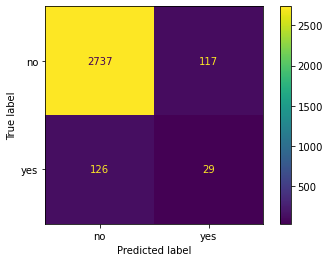

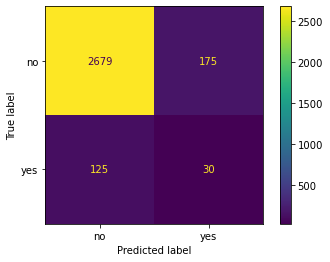

In [54]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test);

From the above confusion matrix, our model shows large proportion of our clients did not subscribe to a term deposit. The performance of the model is quite okay considering our target variable was imbalanced, weighing more to those who didn't subscribe (no).

In [55]:
depth = model_reg.named_steps["decisiontreeclassifier"].get_depth()
print("tree depth", depth)

tree depth 35


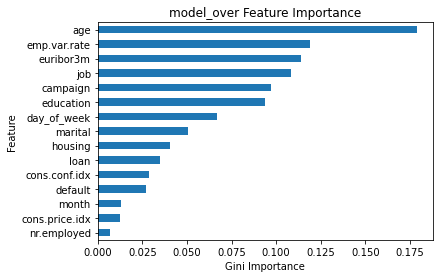

In [31]:
# Get importances
importances = model_over.named_steps['decisiontreeclassifier'].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index = X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

Building ensemble models on multiple models on random subsets of the same data, and then comparing their predictions to make a final prediction. RandomForestClassifier

We'll start by creating a pipeline to streamline our workflow.

Creating a pipeline named clf (short for "classifier") that contains a Ordinalencoder transformer and a RandomForestClassifier predictor.

In [59]:
clf = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
                    RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


Creating a dictionary with the range of hyperparameters that we want to evaluate for our classifier.

1. For the Ordinalencoder, try both the "use_encoded_value" and "unknown_value=-1".

2. For the RandomForestClassifier, max_depth settings between 10 and 40, by steps of 10.

3. Also for the RandomForestClassifier,  n_estimators settings between 25 and 100 by steps of 25.

In [65]:
params = {
    "ordinalencoder__handle_unknown": ["use_encoded_value", "unknown_value=-1"],
    "randomforestclassifier__n_estimators": range(25,100,25),
    "randomforestclassifier__max_depth":range(10,40,10)
}
params

{'ordinalencoder__handle_unknown': ['use_encoded_value', 'unknown_value=-1'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 40, 10)}

Create a GridSearchCV named model that includes your classifier and hyperparameter grid

In [66]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv = 5,
    n_jobs = -1,
    verbose =1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(handle_unknown='use_encoded_value',
                                                       unknown_value=-1)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'ordinalencoder__handle_unknown': ['use_encoded_value',
                                                            'unknown_value=-1'],
                         'randomforestclassifier__max_depth': range(10, 40, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

Fitting the model to the over-sampled training data.



In [67]:
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\MAUREEN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MAUREEN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MAUREEN\anaconda3\lib\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\MAUREEN\anaconda3\lib\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\MAURE

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(handle_unknown='use_encoded_value',
                                                       unknown_value=-1)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'ordinalencoder__handle_unknown': ['use_encoded_value',
                                                            'unknown_value=-1'],
                         'randomforestclassifier__max_depth': range(10, 40, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

 Extract the cross-validation results from model and load them into a DataFrame named cv_results

In [68]:
cv_results =pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ordinalencoder__handle_unknown,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.068601,0.097939,0.102999,0.013432,use_encoded_value,10,25,{'ordinalencoder__handle_unknown': 'use_encode...,0.825954,0.800921,0.803333,0.817584,0.787766,0.807111,0.013353,8
1,1.538601,0.016943,0.124398,0.008381,use_encoded_value,10,50,{'ordinalencoder__handle_unknown': 'use_encode...,0.826611,0.798071,0.793686,0.812980,0.795878,0.805445,0.012562,9
2,2.536604,0.345961,0.203402,0.057610,use_encoded_value,10,75,{'ordinalencoder__handle_unknown': 'use_encode...,0.828146,0.797632,0.796317,0.814734,0.807060,0.808778,0.011773,7
3,1.428201,0.170851,0.124800,0.019051,use_encoded_value,20,25,{'ordinalencoder__handle_unknown': 'use_encode...,0.990794,0.986187,0.988380,0.990791,0.989037,0.989038,0.001716,6
4,2.254192,0.041324,0.181005,0.016659,use_encoded_value,20,50,{'ordinalencoder__handle_unknown': 'use_encode...,0.991232,0.987941,0.992765,0.991230,0.990572,0.990748,0.001578,4
5,3.628601,0.335558,0.239002,0.017991,use_encoded_value,20,75,{'ordinalencoder__handle_unknown': 'use_encode...,0.992109,0.987941,0.990791,0.991668,0.990353,0.990573,0.001455,5
6,1.148202,0.031687,0.106397,0.001020,use_encoded_value,30,25,{'ordinalencoder__handle_unknown': 'use_encode...,0.992766,0.988380,0.992545,0.990791,0.990791,0.991055,0.001578,3
7,2.345055,0.094095,0.207511,0.024332,use_encoded_value,30,50,{'ordinalencoder__handle_unknown': 'use_encode...,0.995178,0.988818,0.993861,0.992765,0.991230,0.992370,0.002199,1
8,3.437737,0.236153,0.242400,0.043563,use_encoded_value,30,75,{'ordinalencoder__handle_unknown': 'use_encode...,0.994520,0.988818,0.992984,0.992545,0.991011,0.991976,0.001935,2
9,0.014002,0.002098,0.000000,0.000000,unknown_value=-1,10,25,{'ordinalencoder__handle_unknown': 'unknown_va...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [71]:
model.best_params_

{'ordinalencoder__handle_unknown': 'use_encoded_value',
 'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 50}

# Evaluate 

The moment of truth. Let's see how our model performs.

In [72]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9991
Test Accuracy: 0.9458


Our model is very close to the baseline, its difference of points.

Next, we're going to use a confusion matrix to see how our model performs. To better understand the values we'll see in the matrix, let's first count how many observations in our test set belong to the positive and negative classes.

In [73]:
y_test.value_counts()

no     2854
yes     155
Name: y, dtype: int64

Plot a confusion matrix that shows how your best model performs on your test set

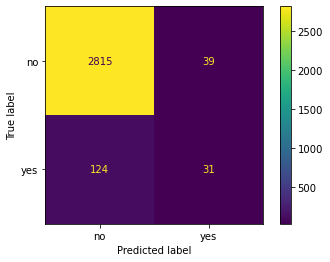

In [74]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

Notice the relationship between the numbers in this matrix with the count we did the previous task. If you sum the values in the bottom row, you get the total number of positive observations in y_train ( 124+31=155 ). And the top row sum to the number of negative observations ( 2815+39= 2854).

# Communicate

Create a horizontal bar chart with the 10 most important features for your model

In [75]:
importances = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
importances

array([0.20142317, 0.10244237, 0.04657998, 0.09496492, 0.0285646 ,
       0.03309045, 0.02775711, 0.        , 0.01805799, 0.06703419,
       0.10761716, 0.00684785, 0.00505391, 0.00920327, 0.05650339,
       0.02097401, 0.02285288, 0.12460611, 0.02642664])

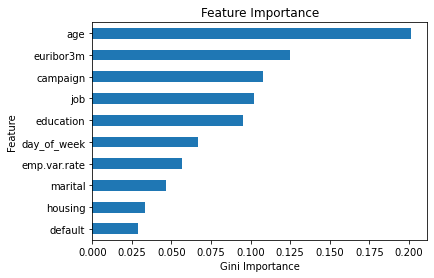

In [76]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index = features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind = 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

Age was a big factor for both models. both models speaks volume on how a client could subscribe to a deposit. 

I reccomend more campaign on engaging clients.|